# Threshold & GMM Analysis

Precision: 0.144
Recall: 0.15
F-Measure: 0.14693877551020407




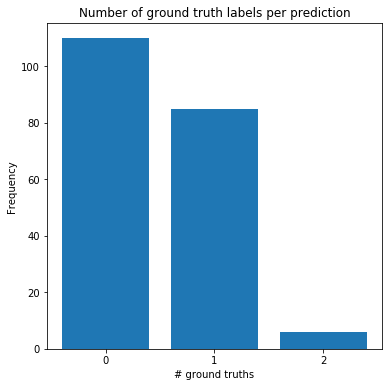

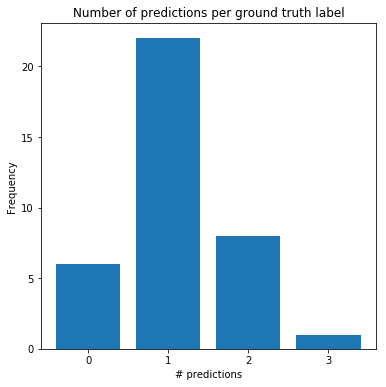

In [11]:
%reload_ext autoreload
%autoreload 2
from IPython.core.pylabtools import figsize
figsize(6, 6)

from tifffile import imread, imsave
from bloby.BlobDetector import BlobDetector
from bloby.BlobMetrics import BlobMetrics
from sklearn.mixture import GaussianMixture
import bloby.util as util
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from datetime import datetime
from skimage import morphology, transform
from skimage.filters import gaussian
from skimage.feature import blob_log
from datetime import datetime

start = datetime.now()

plt.set_cmap('gray')

# source_dict = {
#     'cell_detection_0': 'COLM',
#     'cell_detection_1': 'COLM',
#     'cell_detection_2': 'COLM',
#     'cell_detection_3': 'COLM',
#     'cell_detection_4': 'laVision',
#     'cell_detection_5': 'laVision',
#     'cell_detection_6': 'laVision',
#     'cell_detection_7': 'laVision',
#     'cell_detection_8': 'laVision',
#     'cell_detection_9': 'laVision'
# }

# exp_name = 'cell_detection_0'

# input_tif_path = '../data/s3617/tifs/{}.tiff'.format(exp_name)
# output_csv_path = '../data/s3617/prediction_csv/{}.csv'.format(exp_name)
# img = imread(input_tif_path)

# ground_truth_path = '../data/s3617/annotations/{}.csv'.format(exp_name)
# ground_truth = util.get_list_from_csv(ground_truth_path)

# detector = BlobDetector(input_tif_path, data_source=source_dict[exp_name], verbose=True)
# centroids = np.asarray(detector.get_blob_centroids())
centroids = util.get_list_from_csv('../../nd-multicore/process_folder/final.csv')
# util.write_list_to_csv(centroids, output_csv_path)
# util.plot_csv_on_rgb_tif(ground_truth, input_tif_path, 'marked_final.tiff', color=[0, img.max(), 0])
# util.plot_csv_on_rgb_tif(centroids, 'marked_final.tiff', 'marked_final.tiff', color=[img.max(), 0, 0])

# print('detector threshold', detector.threshold)

metrics = BlobMetrics(ground_truth, centroids)
print('Precision: {}\nRecall: {}\nF-Measure: {}\n\n'.format(metrics.precision(), metrics.recall(), metrics.f_measure()))
metrics.plot_ground_truths_per_prediction()
metrics.plot_predictions_per_ground_truth()
